FIIs

scrap realizado na pagina: https://www.fundsexplorer.com.br/

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [283]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [334]:
data_atual = datetime.date.today().strftime('%Y-%B-%d')
hora_atual = datetime.datetime.now().strftime('%H:%M:%S')
print(f"Dados gerados em: {data_atual} as {hora_atual}.")


Dados gerados em: 2023-August-10 as 10:21:40.


In [285]:
# Configurações do Selenium
driver = webdriver.Chrome()  # This assumes the ChromeDriver is in the PATH
url_alvo = 'https://www.fundsexplorer.com.br/ranking'  # URL alvo para o web scraping

In [286]:
# Navega para a URL alvo
driver.get(url_alvo)

In [287]:
# Aguarda até que a tabela de fundos seja carregada
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[3]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [288]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, './/tbody/tr')

# Lista para armazenar os dados
dados_fundos = []

In [289]:
# Percorre as linhas e obtém os dados
for linha in linhas_tabela:
    colunas = linha.find_elements(By.TAG_NAME, 'td')
    if len(colunas) >= 27:
        fundos = colunas[0].text
        setor = colunas[1].text
        preço_atual = colunas[2].text
        liquidez_diaria = colunas[3].text
        pvp = colunas[4].text
        ultimo_dividendo = colunas[5].text
        dividendo_yield = colunas[6].text
        dy_3m_acumulado = colunas[7].text
        dy_6m_acumulado = colunas[8].text
        dy_12m_acumulado = colunas[9].text
        dy_3m_media = colunas[10].text
        dy_6m_media = colunas[11].text
        dy_12m_media = colunas[12].text
        dy_ano = colunas[13].text
        variacao_preco = colunas[14].text
        rentabilidade_periodo = colunas[15].text
        rentabilidade_acumulada = colunas[16].text
        patrimonio_liquido = colunas[17].text
        vpa = colunas[18].text
        pvpa = colunas[19].text
        dy_patrimonial = colunas[20].text
        variacao_patrimonial = colunas[21].text
        rentabilidade_patrimonio_periodo = colunas[22].text
        rentabilidade_patrimonio_acumulada = colunas[23].text
        vacancia_fisica = colunas[24].text
        vacancia_financeira = colunas[25].text
        quantidade_de_ativos = colunas[26].text


        dados_fundos.append([fundos, setor, preço_atual, liquidez_diaria, pvp, ultimo_dividendo, dividendo_yield, 
                             dy_3m_acumulado, dy_6m_acumulado, dy_12m_acumulado, dy_3m_media, dy_6m_media, dy_12m_media,
                             dy_ano, variacao_preco, rentabilidade_periodo, rentabilidade_acumulada, patrimonio_liquido, 
                             vpa, pvpa, dy_patrimonial, variacao_patrimonial, rentabilidade_patrimonio_periodo, 
                             rentabilidade_patrimonio_acumulada, vacancia_fisica, vacancia_financeira, quantidade_de_ativos])

In [290]:

# Cria um DataFrame usando Pandas
df = pd.DataFrame(dados_fundos, columns=["Fundos", "Setor", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", 
                                         "Ultimo Dividendo(R$)", "Dividend Yield", "DY (3M) Acumulado", "DY(6M) Acumulado",
                                         "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
                                         "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", 
                                         "VPA", "P/VPA", "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", 
                                         "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", "Quantidade de Ativos"])



# Finaliza o driver
driver.quit()

In [291]:
df = df.replace('N/A', None)

In [292]:
df.head(5)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,"9,26","848.044,57","1,01","0,12","1,28 %","3,66 %","7,98 %","9,54 %",...,"230.646.828,88","9,60","0,96","1,46 %","0,00 %","0,00 %","0,00 %",None,None,0
1,ABCP11,SHOPPINGS,"72,34","49.896,29","0,79","0,50","0,70 %","2,12 %","4,39 %","8,89 %",...,"432.162.687,00","91,82","0,79","0,65 %","-0,18 %","0,47 %","7,12 %",None,None,1
2,AFHI11,PAPÉIS,"98,32","1.672.800,46","1,02","1,10","1,11 %","3,38 %","6,80 %","13,31 %",...,"290.388.018,85","94,82","1,04","1,01 %","-0,94 %","0,06 %","5,00 %",None,None,0
3,AGRX11,OUTROS,"10,68","384.654,93",None,"0,12","1,08 %","4,19 %","8,99 %","15,78 %",...,None,None,None,None,None,None,None,None,None,0
4,AIEC11,LAJES CORPORATIVAS,"69,95","633.780,00","0,74","0,76","1,06 %","3,37 %","7,10 %","13,13 %",...,"456.469.305,49","102,56","0,68","0,73 %","0,24 %","0,98 %","9,40 %",None,None,2


In [293]:
df["Setor"].value_counts()

PAPÉIS                              80
INDEFINIDO                          61
LAJES CORPORATIVAS                  56
FUNDO DE DESENVOLVIMENTO            40
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    38
FUNDO DE FUNDOS                     33
SHOPPINGS                           25
MISTO                               24
HOSPITALAR                           6
IMÓVEIS COMERCIAIS - OUTROS          5
VAREJO                               5
IMÓVEIS RESIDENCIAIS                 4
AGÊNCIAS DE BANCOS                   4
EDUCACIONAL                          4
HOTÉIS                               3
OUTROS                               1
FIAGRO                               1
Name: Setor, dtype: int64

Agrupar por tipo os setores(melhorar a descrição)

In [294]:


# Definir as condições e valores correspondentes
condicoes = [
    (df['Setor'] == 'LAJES CORPORATIVAS')|(df['Setor'] == 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS')|(df['Setor'] == 'SHOPPINGS')
    |(df['Setor'] == 'HOSPITALAR')|(df['Setor'] == 'IMÓVEIS COMERCIAIS - OUTROS')|(df['Setor'] == 'VAREJO')
    |(df['Setor'] == 'IMÓVEIS RESIDENCIAIS')|(df['Setor'] == 'AGÊNCIAS DE BANCOS')|(df['Setor'] == 'EDUCACIONAL')
    |(df['Setor'] == 'HOTÉIS'),    
    (df['Setor'] == 'PAPÉIS'),
    (df['Setor'] == 'FUNDO DE DESENVOLVIMENTO'),
    (df['Setor'] == 'MISTO'),
    (df['Setor'] == 'FUNDO DE FUNDOS'),
    (df['Setor'] == 'FIAGRO'),
    (df['Setor'] == 'INDEFINIDO')
]

valores = ['TIJOLO','PAPÉIS', 'FUNDO DE DESENVOLVIMENTO', 'HIBRIDO', 'FOF','FIAGRO', 'INDEFINIDO',]

# Criar uma nova coluna com base nas condições
df['Tipo'] = np.select(condicoes, valores, default='Outro')
df = df[["Fundos","Tipo", "Setor", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP","Ultimo Dividendo(R$)", "Dividend Yield", 
"DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
"Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", "DY Patrimonial", 
"Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", 
"Quantidade de Ativos"]]


In [295]:
df.loc[df['Fundos'].isin(['AAZQ11', 'AGRX11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11', 'FGAA11', 'FZDA11', 
'FZDB11', 'GCRA11', 'GRWA11', 'IAAG11', 'JGPX11', 'KNCA11', 'LSAG11', 'NCRA11', 'OIAG11', 'PLCA11', 'QAGR11', 'RURA11', 
'RZAG11', 'SNAG11', 'VCRA11','VGIA11', 'XPCA11']), 'Tipo'] = 'FIAGRO'

In [296]:
df["Tipo"].value_counts()

TIJOLO                      150
PAPÉIS                       79
INDEFINIDO                   41
FUNDO DE DESENVOLVIMENTO     40
FOF                          33
FIAGRO                       26
HIBRIDO                      21
Name: Tipo, dtype: int64

In [297]:
df.head(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
0,AAZQ11,FIAGRO,INDEFINIDO,"9,26","848.044,57","1,01","0,12","1,28 %","3,66 %","7,98 %",...,"230.646.828,88","9,60","0,96","1,46 %","0,00 %","0,00 %","0,00 %",None,None,0
1,ABCP11,TIJOLO,SHOPPINGS,"72,34","49.896,29","0,79","0,50","0,70 %","2,12 %","4,39 %",...,"432.162.687,00","91,82","0,79","0,65 %","-0,18 %","0,47 %","7,12 %",None,None,1
2,AFHI11,PAPÉIS,PAPÉIS,"98,32","1.672.800,46","1,02","1,10","1,11 %","3,38 %","6,80 %",...,"290.388.018,85","94,82","1,04","1,01 %","-0,94 %","0,06 %","5,00 %",None,None,0
3,AGRX11,FIAGRO,OUTROS,"10,68","384.654,93",None,"0,12","1,08 %","4,19 %","8,99 %",...,None,None,None,None,None,None,None,None,None,0
4,AIEC11,TIJOLO,LAJES CORPORATIVAS,"69,95","633.780,00","0,74","0,76","1,06 %","3,37 %","7,10 %",...,"456.469.305,49","102,56","0,68","0,73 %","0,24 %","0,98 %","9,40 %",None,None,2


In [298]:
df.sample(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
381,XPLG11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,"114,98","3.192.584,07","1,02","0,78","0,68 %","2,08 %","4,39 %",...,"3.064.092.496,84","114,49","1,00","0,65 %","0,19 %","0,84 %","11,47 %",None,None,19
236,NEWU11,TIJOLO,LAJES CORPORATIVAS,"73,10","126.839,07","1,06","0,20","0,27 %","0,66 %","1,22 %",...,"51.277.626,53","64,92","1,13","0,12 %","-0,31 %","-0,19 %","-0,19 %",None,None,3
40,BPFF11,FOF,FUNDO DE FUNDOS,"71,00","259.935,57","0,91","0,62","0,85 %","2,68 %","5,73 %",...,"348.987.341,99","74,28","0,96","0,83 %","-5,10 %","-4,31 %","3,18 %",None,None,0
385,XTED11,TIJOLO,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",None,None,None,...,"67.378.204,04","28,02","0,31","0,00 %","-0,36 %","-0,36 %","-3,45 %",None,None,1
151,HGRE11,TIJOLO,LAJES CORPORATIVAS,"143,80","2.890.945,96","0,92","0,78","0,55 %","2,13 %","4,14 %",...,"1.837.461.314,87","161,29","0,89","0,48 %","-0,12 %","0,36 %","2,41 %",None,None,19


In [299]:
df.tail(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
385,XTED11,TIJOLO,LAJES CORPORATIVAS,"8,82","17.641,88","0,68","11,16",None,None,None,...,"67.378.204,04","28,02","0,31","0,00 %","-0,36 %","-0,36 %","-3,45 %",None,None,1
386,YUFI11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,"95,00","199,00","0,93","0,30","0,37 %","0,85 %","1,09 %",...,"50.096.123,92",None,None,None,None,None,None,None,None,31
387,YUFI11B,INDEFINIDO,INDEFINIDO,None,None,None,"0,63","0,00 %","0,00 %","0,00 %",...,None,"105,53",None,"0,60 %","-0,01 %","0,59 %","6,32 %",None,None,0
388,ZAVI11,INDEFINIDO,INDEFINIDO,"127,00","239.972,89","0,93","1,12","0,88 %","2,67 %","5,24 %",...,"127.018.551,30",None,None,None,None,None,None,None,None,8
389,ZIFI11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,"984,29","4.484,00","0,82","3,31","0,00 %","0,00 %","0,00 %",...,"57.307.512,13",None,None,None,None,None,None,None,None,0


converter os campos em numeros(melhorar a descrição)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fundos                   390 non-null    object
 1   Tipo                     390 non-null    object
 2   Setor                    390 non-null    object
 3   Preço Atual(R$)          363 non-null    object
 4   Liquidez Diária(R$)      353 non-null    object
 5   P/VP                     345 non-null    object
 6   Ultimo Dividendo(R$)     390 non-null    object
 7   Dividend Yield           372 non-null    object
 8   DY (3M) Acumulado        372 non-null    object
 9   DY(6M) Acumulado         372 non-null    object
 10  DY(12M) Acumulado        372 non-null    object
 11  DY(3M) Média             372 non-null    object
 12  DY(6M) Média             372 non-null    object
 13  DY(12M) Média            372 non-null    object
 14  DY Ano                   371 non-null    o

In [301]:
df = df.replace('%', '', regex=True)
df = df.replace('\.', '', regex=True)
df = df.replace(',', '.', regex=True)

In [302]:
colunas_numericas = ["Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", "Ultimo Dividendo(R$)", "Dividend Yield",
 "DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", 
 "DY Ano", "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", 
 "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Quantidade de Ativos"]
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)

___

In [303]:
df.isnull().sum()

Fundos                       0
Tipo                         0
Setor                        0
Preço Atual(R$)             27
Liquidez Diária(R$)         37
P/VP                        45
Ultimo Dividendo(R$)         0
Dividend Yield              18
DY (3M) Acumulado           18
DY(6M) Acumulado            18
DY(12M) Acumulado           18
DY(3M) Média                18
DY(6M) Média                18
DY(12M) Média               18
DY Ano                      19
Variação do Preço           18
Rentab. Período             18
Rentab. Acumulada          105
Patrimônio Líquido          23
VPA                         93
P/VPA                      100
DY Patrimonial              93
Variação Patrimonial        93
Rentab. Patr. Período       93
Rentab. Patr. Acumulada     93
Vacancia Física            390
Vacancia Financeira        390
Quantidade de Ativos         0
dtype: int64

In [304]:
df.shape

(390, 28)

In [305]:
df = df.drop(columns='Vacancia Física')

In [306]:
df = df.drop(columns='Vacancia Financeira')

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   390 non-null    object 
 1   Tipo                     390 non-null    object 
 2   Setor                    390 non-null    object 
 3   Preço Atual(R$)          363 non-null    float64
 4   Liquidez Diária(R$)      353 non-null    float64
 5   P/VP                     345 non-null    float64
 6   Ultimo Dividendo(R$)     390 non-null    float64
 7   Dividend Yield           372 non-null    float64
 8   DY (3M) Acumulado        372 non-null    float64
 9   DY(6M) Acumulado         372 non-null    float64
 10  DY(12M) Acumulado        372 non-null    float64
 11  DY(3M) Média             372 non-null    float64
 12  DY(6M) Média             372 non-null    float64
 13  DY(12M) Média            372 non-null    float64
 14  DY Ano                   3

In [308]:
df = df.dropna(how='any')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 384
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   243 non-null    object 
 1   Tipo                     243 non-null    object 
 2   Setor                    243 non-null    object 
 3   Preço Atual(R$)          243 non-null    float64
 4   Liquidez Diária(R$)      243 non-null    float64
 5   P/VP                     243 non-null    float64
 6   Ultimo Dividendo(R$)     243 non-null    float64
 7   Dividend Yield           243 non-null    float64
 8   DY (3M) Acumulado        243 non-null    float64
 9   DY(6M) Acumulado         243 non-null    float64
 10  DY(12M) Acumulado        243 non-null    float64
 11  DY(3M) Média             243 non-null    float64
 12  DY(6M) Média             243 non-null    float64
 13  DY(12M) Média            243 non-null    float64
 14  DY Ano                   2

In [310]:
num_estudos = df.shape[0]
print(f"O estudo segue com {num_estudos} estudos.")

O estudo segue com 243 estudos.


___

In [311]:
df

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,FIAGRO,INDEFINIDO,9.26,848044.57,1.01,0.12,1.28,3.66,7.98,...,-2.16,5.44,2.306468e+08,9.60,0.96,1.46,0.00,0.00,0.00,0
1,ABCP11,TIJOLO,SHOPPINGS,72.34,49896.29,0.79,0.50,0.70,2.12,4.39,...,1.18,2.27,4.321627e+08,91.82,0.79,0.65,-0.18,0.47,7.12,1
2,AFHI11,PAPÉIS,PAPÉIS,98.32,1672800.46,1.02,1.10,1.11,3.38,6.80,...,1.92,8.99,2.903880e+08,94.82,1.04,1.01,-0.94,0.06,5.00,0
4,AIEC11,TIJOLO,LAJES CORPORATIVAS,69.95,633780.00,0.74,0.76,1.06,3.37,7.10,...,2.09,10.89,4.564693e+08,102.56,0.68,0.73,0.24,0.98,9.40,2
6,ALZM11,FOF,FUNDO DE FUNDOS,92.00,87169.79,1.00,0.85,0.92,2.74,5.85,...,0.69,13.77,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.15,428225.07,0.81,0.65,0.78,2.38,5.06,...,0.73,19.32,7.301584e+08,103.81,0.80,0.63,-1.37,-0.75,0.75,98
381,XPLG11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.98,3192584.07,1.02,0.78,0.68,2.08,4.39,...,0.86,21.59,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
382,XPML11,TIJOLO,SHOPPINGS,109.89,8888751.57,1.12,0.83,0.80,2.37,4.76,...,0.75,10.64,2.472954e+09,101.27,1.09,0.76,-0.66,0.10,6.56,12
383,XPPR11,TIJOLO,LAJES CORPORATIVAS,22.12,273673.36,0.31,0.10,0.45,1.31,2.46,...,-2.17,-28.18,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5


In [312]:
df["Setor"].value_counts()

PAPÉIS                              62
LAJES CORPORATIVAS                  37
INDEFINIDO                          29
FUNDO DE FUNDOS                     29
IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    28
SHOPPINGS                           16
MISTO                               14
FUNDO DE DESENVOLVIMENTO             7
IMÓVEIS RESIDENCIAIS                 4
AGÊNCIAS DE BANCOS                   4
HOSPITALAR                           4
EDUCACIONAL                          3
VAREJO                               3
HOTÉIS                               2
IMÓVEIS COMERCIAIS - OUTROS          1
Name: Setor, dtype: int64

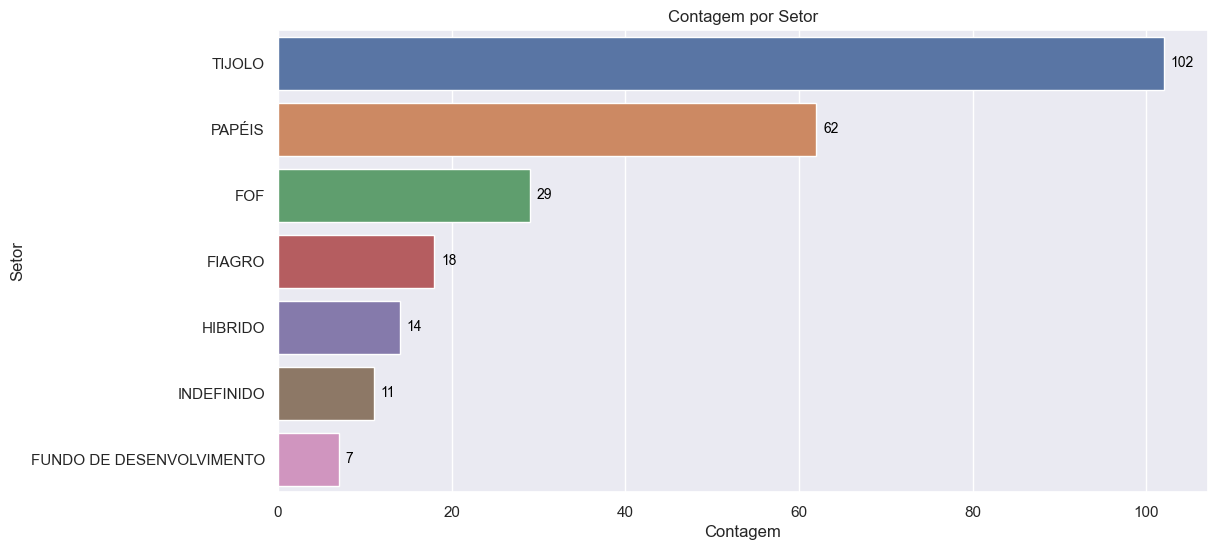

In [313]:
# Criar o gráfico de contagem
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Tipo', data=df, order=df['Tipo'].value_counts().index)

# Adicionar os números inteiros nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Contagem')
plt.ylabel('Setor')
plt.title('Contagem por Setor')
plt.show()


Perguntar pra fabiana se faz sentido as escalas

os mais pagadores por tipo, os maiores dividendos, maior pagador, menor pagador


RENTABILIDADE DOS ULTIMOS 12 MESES

plot para ver outliers de preço por tipo de fiis

___

Geral

In [314]:
df_teste = df[(df['P/VPA'] <= 1)]
df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]
df_teste2 = df_teste2.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
pd.Dataframe=df_teste2
df_teste2.head(10)


C:\Users\dougl\AppData\Local\Temp\ipykernel_19540\1765953071.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]


,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
259,PQDP11,TIJOLO,SHOPPINGS,1964.01,98899.11,0.63,17.15,0.86,2.70,6.09,...,5.35,-1.14,7.663975e+08,3314.36,0.59,0.50,0.07,0.57,1.70,1
301,RNDP11,PAPÉIS,PAPÉIS,134.99,3422.30,0.75,10.25,8.25,9.46,25.65,...,12.14,6.82,1.934453e+07,189.52,0.71,0.41,-40.99,-40.75,-69.57,0
119,FPAB11,TIJOLO,LAJES CORPORATIVAS,194.75,3688.96,0.52,5.67,3.03,4.85,7.36,...,3.30,48.61,2.806816e+08,410.44,0.47,0.40,0.00,0.40,4.53,2
140,HCRI11,TIJOLO,HOSPITALAR,292.98,38772.32,0.95,2.68,1.02,3.17,6.54,...,8.23,23.12,6.164182e+07,299.94,0.98,0.81,-0.00,0.81,3.06,1
267,RBDS11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,2.69,446.88,0.12,2.35,11.21,23.43,54.02,...,-45.73,-45.73,2.851592e+06,22.98,0.12,0.00,0.00,0.00,0.00,0
95,EDFO11B,TIJOLO,LAJES CORPORATIVAS,192.08,4688.20,1.06,1.77,0.92,2.71,5.27,...,2.25,-6.99,4.265095e+07,191.82,1.00,0.86,-0.03,0.82,7.83,1
65,CCRF11,PAPÉIS,PAPÉIS,90.99,5705.52,0.91,1.65,1.90,3.38,6.30,...,6.31,6.25,1.568094e+08,96.46,0.94,0.57,-1.87,-1.31,2.72,0
237,NSLU11,TIJOLO,HOSPITALAR,191.71,96621.00,0.96,1.56,0.86,2.58,5.35,...,3.23,16.22,2.579338e+08,194.78,0.98,0.77,0.05,0.82,3.11,1
105,FAED11,TIJOLO,EDUCACIONAL,173.09,247626.89,0.80,1.48,0.84,2.75,6.11,...,7.10,29.15,1.397621e+08,216.18,0.80,0.71,0.00,0.71,4.95,3
113,FIIP11B,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,170.24,54396.86,0.84,1.44,0.81,2.56,5.38,...,8.40,28.87,1.884112e+08,186.18,0.91,0.73,-0.12,0.60,0.12,7


In [315]:
novo_df = df_teste2[['Setor','Fundos', 'Ultimo Dividendo(R$)', 'P/VPA', 'Preço Atual(R$)']]

In [316]:
novo_df = novo_df.sort_values(by='Ultimo Dividendo(R$)', ascending=False)

In [317]:
novo_df

,Setor,Fundos,Ultimo Dividendo(R$),P/VPA,Preço Atual(R$)
259,SHOPPINGS,PQDP11,17.15,0.59,1964.01
301,PAPÉIS,RNDP11,10.25,0.71,134.99
119,LAJES CORPORATIVAS,FPAB11,5.67,0.47,194.75
140,HOSPITALAR,HCRI11,2.68,0.98,292.98
267,FUNDO DE DESENVOLVIMENTO,RBDS11,2.35,0.12,2.69
...,...,...,...,...,...
197,FUNDO DE DESENVOLVIMENTO,KNRE11,0.07,0.69,0.57
354,FUNDO DE FUNDOS,VIFI11,0.07,0.96,8.55
358,MISTO,VIUR11,0.07,0.87,8.27
35,FUNDO DE FUNDOS,BLMR11,0.06,0.95,7.42


In [318]:
novo_df.groupby(['Setor'])['Ultimo Dividendo(R$)'].count().reset_index().sort_values(by='Ultimo Dividendo(R$)', ascending=False)

,Setor,Ultimo Dividendo(R$)
11,PAPÉIS,41
8,INDEFINIDO,17
3,FUNDO DE FUNDOS,15
6,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,10
9,LAJES CORPORATIVAS,9
10,MISTO,8
4,HOSPITALAR,4
2,FUNDO DE DESENVOLVIMENTO,3
7,IMÓVEIS RESIDENCIAIS,3
12,SHOPPINGS,3


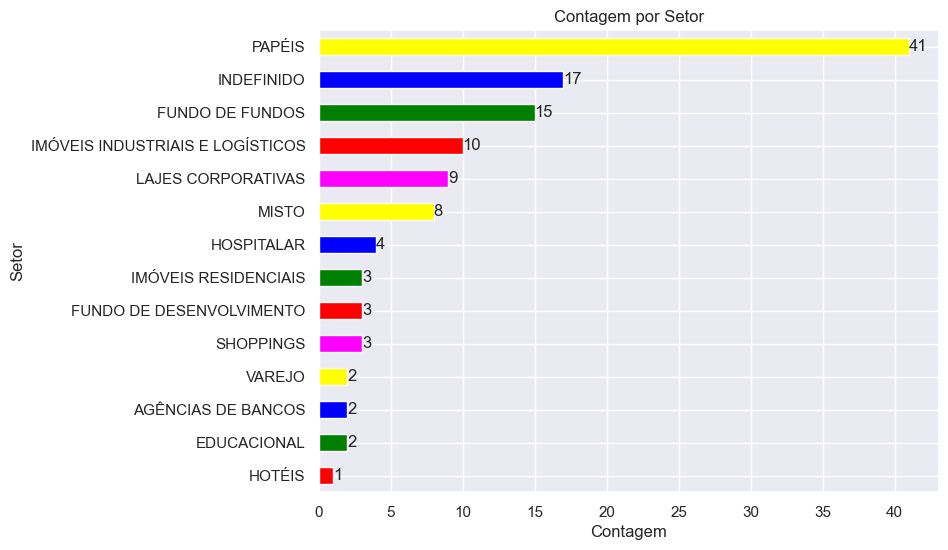

In [319]:
contagem_setor = novo_df['Setor'].value_counts().sort_values(ascending=True)
cores = ['red', 'green', 'blue', 'yellow', 'magenta']
ax = contagem_setor.plot(kind='barh', figsize=(8, 6), color=cores)
plt.title('Contagem por Setor')
plt.xlabel('Contagem')
plt.ylabel('Setor')
for i, v in enumerate(contagem_setor):
    ax.text(v, i, str(v), ha='left', va='center')

plt.show()

In [320]:
df_teste

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,FIAGRO,INDEFINIDO,9.26,848044.57,1.01,0.12,1.28,3.66,7.98,...,-2.16,5.44,2.306468e+08,9.60,0.96,1.46,0.00,0.00,0.00,0
1,ABCP11,TIJOLO,SHOPPINGS,72.34,49896.29,0.79,0.50,0.70,2.12,4.39,...,1.18,2.27,4.321627e+08,91.82,0.79,0.65,-0.18,0.47,7.12,1
4,AIEC11,TIJOLO,LAJES CORPORATIVAS,69.95,633780.00,0.74,0.76,1.06,3.37,7.10,...,2.09,10.89,4.564693e+08,102.56,0.68,0.73,0.24,0.98,9.40,2
6,ALZM11,FOF,FUNDO DE FUNDOS,92.00,87169.79,1.00,0.85,0.92,2.74,5.85,...,0.69,13.77,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,0
8,APTO11,TIJOLO,IMÓVEIS RESIDENCIAIS,9.85,56125.18,0.93,0.10,1.01,3.25,6.94,...,0.81,22.40,4.249521e+07,9.97,0.99,1.00,-0.78,0.22,13.14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,XPCM11,TIJOLO,LAJES CORPORATIVAS,13.01,42587.29,0.31,0.07,0.52,1.60,3.88,...,-2.65,-1.49,1.015336e+08,51.53,0.25,0.33,-0.77,-0.45,-2.97,1
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.15,428225.07,0.81,0.65,0.78,2.38,5.06,...,0.73,19.32,7.301584e+08,103.81,0.80,0.63,-1.37,-0.75,0.75,98
381,XPLG11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.98,3192584.07,1.02,0.78,0.68,2.08,4.39,...,0.86,21.59,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
383,XPPR11,TIJOLO,LAJES CORPORATIVAS,22.12,273673.36,0.31,0.10,0.45,1.31,2.46,...,-2.17,-28.18,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5


In [321]:
df_geral = df.sort_values(by='P/VPA')


In [322]:
df_geral2 = df_geral.sort_values(by='Preço Atual(R$)', ascending=True)

In [323]:
df_geral2

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
197,KNRE11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,0.57,12145.36,0.76,0.07,12.52,82.61,138.46,...,-36.99,6.59,1.399739e+07,0.83,0.69,36.83,-28.53,-2.21,-8.03,1
62,CARE11,HIBRIDO,MISTO,1.97,13997.46,0.24,0.01,0.23,0.67,1.36,...,-2.41,-7.39,2.977898e+08,1.60,1.23,0.10,-0.24,-0.14,3.56,1
339,TORD11,HIBRIDO,MISTO,2.62,316397.36,0.21,0.05,0.90,2.51,5.20,...,-23.85,-23.85,4.358046e+08,14.09,0.19,0.57,-0.45,0.12,12.89,1
267,RBDS11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,2.69,446.88,0.12,2.35,11.21,23.43,54.02,...,-45.73,-45.73,2.851592e+06,22.98,0.12,0.00,0.00,0.00,0.00,0
366,VSLH11,PAPÉIS,PAPÉIS,3.87,322791.21,0.38,0.03,0.74,1.87,3.85,...,-18.07,-53.02,3.014196e+08,10.47,0.37,1.05,-0.53,0.51,19.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,SHPH11,TIJOLO,SHOPPINGS,794.00,103726.89,0.89,4.20,0.53,2.17,3.89,...,5.69,13.30,5.429901e+08,889.27,0.89,0.30,0.02,0.33,3.96,1
106,FAMB11B,TIJOLO,LAJES CORPORATIVAS,900.00,133892.04,0.31,9.16,0.56,2.18,4.80,...,-47.51,-53.68,3.084430e+08,3593.26,0.25,0.25,0.53,0.79,12.82,1
25,BICE11,FOF,FUNDO DE FUNDOS,1000.00,561471.00,1.02,7.79,0.78,1.79,3.09,...,1.87,1.87,7.667966e+07,1017.80,0.98,1.57,5.06,6.71,8.19,0
15,BBFI11B,TIJOLO,LAJES CORPORATIVAS,1081.00,171986.75,0.50,6.21,0.55,1.40,6.46,...,-1.17,-38.81,2.791857e+08,2854.80,0.38,0.93,0.12,1.06,6.06,3


___

Setor Papéis

In [324]:
df_papeis = df[df['Setor']=='PAPÉIS']
df_papeis = df_papeis.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
df_papeis.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
301,RNDP11,PAPÉIS,PAPÉIS,134.99,3422.30,0.75,10.25,8.25,9.46,25.65,...,12.14,6.82,1.934453e+07,189.52,0.71,0.41,-40.99,-40.75,-69.57,0
65,CCRF11,PAPÉIS,PAPÉIS,90.99,5705.52,0.91,1.65,1.90,3.38,6.30,...,6.31,6.25,1.568094e+08,96.46,0.94,0.57,-1.87,-1.31,2.72,0
61,CACR11,PAPÉIS,PAPÉIS,104.81,690880.14,1.01,1.42,1.31,4.26,8.41,...,3.72,14.71,1.878970e+08,103.41,1.01,1.37,-0.05,1.32,37.55,0
219,MCHY11,PAPÉIS,PAPÉIS,110.02,30420.32,1.08,1.40,1.25,3.75,7.55,...,0.20,9.06,3.653825e+08,99.69,1.10,3.41,-3.72,-0.43,9.03,0
286,RBRY11,PAPÉIS,PAPÉIS,101.99,1506092.57,1.02,1.25,1.25,3.81,7.59,...,2.99,11.47,5.549563e+08,99.30,1.03,1.01,-0.58,0.42,3.41,0
180,JPPA11,PAPÉIS,PAPÉIS,98.50,316516.32,0.99,1.25,1.25,3.97,8.21,...,4.19,4.31,8.972954e+07,99.04,0.99,1.41,-0.73,0.67,11.76,0
272,RBHY11,PAPÉIS,PAPÉIS,93.56,95889.86,1.00,1.20,1.27,3.83,7.70,...,2.20,6.53,1.774237e+08,94.54,0.99,1.27,-0.77,0.49,12.61,0
244,OUJP11,PAPÉIS,PAPÉIS,99.82,581072.00,1.01,1.20,1.18,3.66,7.60,...,0.15,11.99,3.210059e+08,99.94,1.00,1.20,-1.18,0.01,13.55,0
135,HABT11,PAPÉIS,PAPÉIS,95.92,1302583.68,0.96,1.20,1.25,3.89,8.21,...,-0.10,17.15,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,0
310,RZAK11,PAPÉIS,PAPÉIS,91.61,5516152.18,0.98,1.20,1.26,3.97,7.68,...,0.74,4.84,8.200132e+08,92.64,0.99,1.62,-0.41,1.20,7.90,0


//*[@id="widget-container"]/div[2]/div[3]/div[2]/div[1]/div/table/tr[1]/td[2]/div/canvas[2]

In [325]:
driver = webdriver.Chrome()
driver.get('https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/cotacoes/')

In [326]:
# Aguarda até que a tabela de fundos seja carregada
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="conteudo-principal"]/div[3]/div/div/div[2]/div/div/div[1]/div[1]/div[1]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [327]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, '//*[@id="conteudo-principal"]/div[3]/div/div/div[2]/div/div/div[1]/div[1]/div[1]')

In [328]:
linhas_tabela

[<selenium.webdriver.remote.webelement.WebElement (session="127bd146beaa4cdbb1b3fe1360d6f4ad", element="548E355D179BEA7E4A3438ED8F8CB8EE_element_29")>]

Setor Lajes Corporativas

___


Setor Indefinido

In [329]:
df_indefinido = df[df['Setor']=='INDEFINIDO']
df_indefinido = df_indefinido.sort_values(by='Ultimo Dividendo', ascending=False)
df_indefinido.head(10)

KeyError: 'Ultimo Dividendo'

TICKER = LISTA PERCORRIDA
TICKER.SA

FAZER PERCORRER UMA LISTA E PLOTAR SOMENTE OS MELHORES

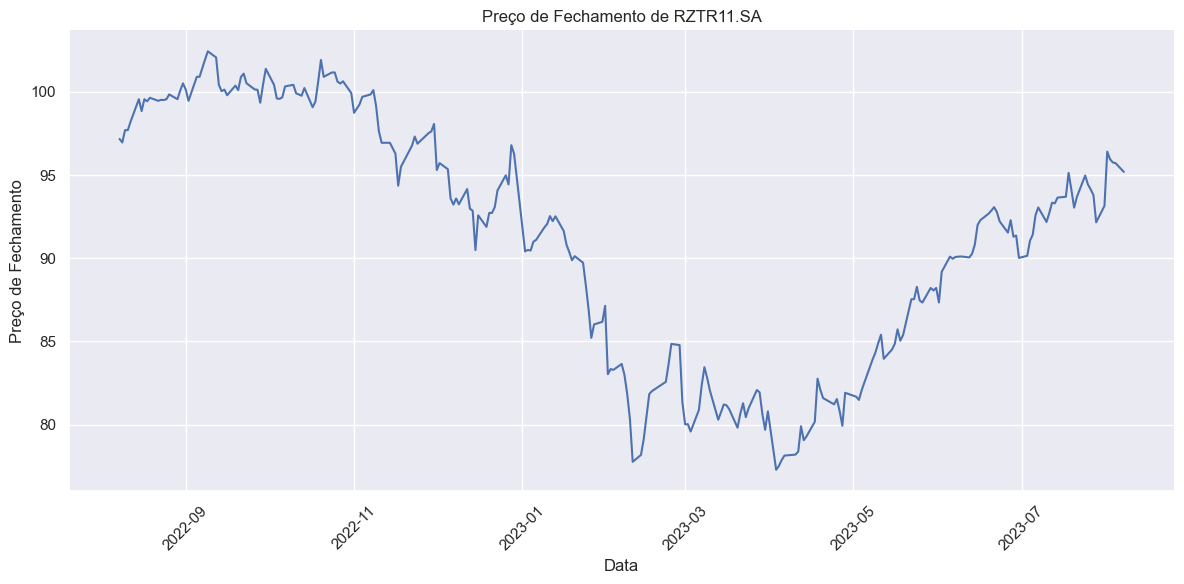

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Defina o estilo seaborn
sns.set_theme(style="darkgrid")

# Defina o ticker que você deseja obter (EGAF11.SA)
ticker = "RZTR11.SA"

# Crie um objeto Ticker usando yfinance
fund = yf.Ticker(ticker)

# Obtenha os dados históricos
start_date = "2022-08-08"
end_date = "2023-08-08"
historical_data = fund.history(start=start_date, end=end_date)

# Crie um gráfico de linha mais bonito com os dados de preço de fechamento
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b')
plt.title(f"Preço de Fechamento de {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
sns.despine()  # Remover as bordas do gráfico
plt.tight_layout()  # Ajustar o layout
plt.show()


no acima precisa colocar a cotacao nos ultimo ano, mes e 12 meses


https://www.clubefii.com.br/fiis/RZTR11

In [ ]:
"C:\Users\dougl\OneDrive\Imagens\fiis teste de imagem.jpg"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2754070979.py, line 1)

precisa gerar um grafico adicional ,grafico de distribuicão dos ultimos 12 meses

___

Setor Fundos de Fundos

In [ ]:
df_f_fundos = df[df['Setor']=='FUNDO DE FUNDOS']
df_f_fundos = df_f_fundos.sort_values(by='Ultimo Dividendo', ascending=False)
df_f_fundos.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
186,KFOF11,FUNDO DE FUNDOS,97.48,1040574.43,0.96,1.00,1.08,2.91,5.69,10.81,...,9.71,25.52,4.423125e+08,92.06,1.06,0.78,-6.43,-5.70,6.11,0
180,JSAF11,FUNDO DE FUNDOS,97.45,638684.52,0.99,0.93,1.01,3.16,6.64,13.07,...,6.79,16.31,1.553302e+08,94.13,1.04,0.99,-4.06,-3.12,7.12,0
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
22,BCIA11,FUNDO DE FUNDOS,106.00,804999.50,0.97,0.80,0.81,2.63,5.46,10.56,...,11.26,22.26,4.040178e+08,101.16,1.05,0.75,-5.66,-4.95,4.65,0
71,CPFF11,FUNDO DE FUNDOS,74.24,400125.95,0.89,0.75,1.00,2.32,4.24,9.40,...,14.58,20.74,2.111291e+08,78.73,0.94,0.76,-2.56,-1.82,6.71,0
306,RVBI11,FUNDO DE FUNDOS,85.25,211399.45,0.98,0.75,0.90,2.84,6.02,11.85,...,5.55,20.70,1.244864e+08,83.87,1.02,0.89,-2.88,-2.01,5.11,0
124,GCFF11,FUNDO DE FUNDOS,69.30,87694.83,0.89,0.75,1.15,3.26,6.29,11.93,...,-3.31,-5.59,2.793947e+07,82.69,0.84,0.87,-3.88,-3.05,-3.37,0
241,OUFF11,FUNDO DE FUNDOS,73.59,207722.79,0.94,0.72,1.00,3.15,6.55,13.06,...,8.24,20.23,1.411464e+08,76.15,0.97,0.92,-5.19,-4.32,5.61,3
93,DVFF11,FUNDO DE FUNDOS,85.41,47405.60,0.89,0.70,0.84,2.95,6.08,12.31,...,13.53,24.30,1.050454e+08,91.56,0.93,0.93,-4.01,-3.12,8.77,0
296,RFOF11,FUNDO DE FUNDOS,78.90,74570.38,0.95,0.70,0.92,2.90,5.99,11.72,...,7.50,15.72,8.919809e+07,80.55,0.98,0.91,-6.07,-5.22,1.08,0


Setor Imoveis Industriais e Logisticos

In [ ]:
df_iil = df[df['Setor']=='IMÓVEIS INDUSTRIAIS E LOGÍSTICOS']
df_iil = df_iil.sort_values(by='Ultimo Dividendo', ascending=False)
df_iil.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
85,CXTL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,315.00,27752.02,0.76,7.74,2.41,7.41,16.47,46.33,...,-3.35,-7.09,2.222059e+07,686.89,0.46,0.20,-1.86,-1.66,-1.49,1
111,FIIB11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,507.87,225809.98,1.10,3.25,0.64,2.00,4.20,8.94,...,4.11,13.84,3.162176e+08,455.67,1.11,0.83,-0.10,0.74,7.62,9
101,EURO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,244.95,54851.02,0.75,1.90,0.78,2.34,4.71,9.51,...,5.23,11.63,1.248289e+08,312.91,0.78,0.61,0.01,0.62,6.68,7
148,HGLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,163.65,9624864.33,1.06,1.50,0.90,2.27,4.32,8.93,...,6.05,6.13,3.608679e+09,147.80,1.11,0.74,0.37,1.11,9.68,20
112,FIIP11B,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,178.49,63326.43,0.86,1.44,0.87,2.66,5.49,10.65,...,9.16,18.89,1.883974e+08,186.18,0.96,0.73,-0.12,0.60,0.12,7
233,NEWL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,115.00,1373344.24,0.96,1.37,1.27,3.12,5.92,11.77,...,8.62,17.41,2.404972e+08,120.99,0.95,0.74,-0.31,0.44,13.74,3
128,GGRC11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.26,1376880.93,1.06,1.05,0.85,2.64,5.46,10.44,...,6.32,12.11,9.261843e+08,124.59,0.97,0.82,-0.14,0.68,2.07,17
365,VTLT11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,99.70,176351.12,0.99,0.88,0.88,2.80,5.73,10.98,...,10.81,13.21,2.137423e+08,102.98,0.97,0.81,0.05,0.86,8.91,1
43,BRCO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.25,4047778.33,1.01,0.87,0.75,2.05,3.99,7.92,...,3.93,24.16,1.774187e+09,121.55,1.00,0.58,2.01,2.60,8.31,11
314,SDIL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,96.50,1030917.86,1.03,0.83,0.86,2.61,5.36,10.37,...,2.55,7.49,6.131580e+08,98.33,0.98,0.83,-0.22,0.61,9.86,5


Setor Shoppings

In [ ]:
df_shop = df[df['Setor']=='SHOPPINGS']
df_shop= df_shop.sort_values(by='Ultimo Dividendo', ascending=False)
df_shop.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
257,PQDP11,SHOPPINGS,1995.00,124657.31,0.64,16.99,0.89,2.79,5.74,10.23,...,10.13,-6.16,7.663975e+08,3314.36,0.60,0.50,0.07,0.57,1.70,1
318,SHPH11,SHOPPINGS,799.00,137010.51,0.87,7.82,1.03,2.32,3.82,6.26,...,11.83,7.20,5.429901e+08,889.27,0.90,0.30,0.02,0.33,3.96,1
120,FVPQ11,SHOPPINGS,117.50,59605.40,0.61,1.80,1.65,3.33,6.10,9.52,...,8.51,15.10,5.392802e+08,198.60,0.59,0.28,-0.03,0.25,4.39,1
144,HGBS11,SHOPPINGS,226.25,1836236.24,1.01,1.45,0.67,2.10,4.40,8.46,...,5.61,19.74,2.223429e+09,216.98,1.04,0.65,-0.63,0.02,7.57,12
155,HPDP11,SHOPPINGS,82.98,7680.70,0.93,1.00,1.35,2.71,3.93,6.81,...,5.70,12.18,2.603080e+08,95.00,0.87,0.53,0.14,0.67,5.81,1
355,VISC11,SHOPPINGS,119.57,4520231.98,1.03,0.85,0.71,2.16,4.51,8.69,...,2.16,17.87,2.142724e+09,114.93,1.04,0.66,-0.04,0.62,5.92,20
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
210,MALL11,SHOPPINGS,115.60,3264900.05,0.96,0.80,0.68,2.14,4.48,8.85,...,8.02,18.69,1.094884e+09,107.86,1.07,0.72,1.59,2.33,3.97,9
160,HSML11,SHOPPINGS,94.50,2986709.24,0.99,0.74,0.79,2.50,5.25,9.97,...,7.22,20.51,1.500704e+09,97.37,0.97,0.70,-0.19,0.51,4.26,7
363,VSHO11,SHOPPINGS,80.00,143830.95,0.78,0.72,0.92,2.99,6.09,10.71,...,13.02,21.92,2.113756e+08,98.91,0.81,0.69,0.13,0.82,3.57,3


Setor Misto

In [ ]:
df_misto = df[df['Setor']=='MISTO']
df_misto = df_misto.sort_values(by='Ultimo Dividendo', ascending=False)
df_misto.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
244,OURE11,MISTO,85.00,150179.73,0.92,1.00,1.19,3.69,7.66,15.40,...,4.44,9.87,9.920371e+07,92.02,0.92,1.14,-2.16,-1.04,11.12,4
196,KNRI11,MISTO,161.52,4385313.09,1.01,0.95,0.59,2.16,4.19,7.99,...,1.99,21.26,3.869616e+09,160.12,1.01,0.57,-0.09,0.47,7.86,19
368,VVPR11,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,9.72,...,1.30,15.02,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,6
102,EVBI11,MISTO,97.00,130057.27,0.97,0.86,0.90,2.44,4.84,9.48,...,-0.04,7.81,2.123205e+08,100.21,0.97,0.75,-0.71,0.03,7.70,8
151,HGRU11,MISTO,129.00,4121729.86,1.07,0.85,0.64,2.38,4.55,9.48,...,0.75,14.25,2.273290e+09,120.00,1.08,0.68,-0.37,0.31,9.23,71
310,RZTR11,MISTO,95.14,2064309.23,0.97,0.85,0.90,2.77,5.79,12.41,...,3.52,0.59,1.074906e+09,97.31,0.98,1.28,0.00,1.29,10.37,15
7,ALZR11,MISTO,115.72,2970113.23,1.08,0.83,0.70,2.14,4.31,12.40,...,3.60,7.77,1.051986e+09,106.94,1.08,0.68,-0.03,0.65,7.26,13
316,SEQR11,MISTO,67.45,144692.68,0.72,0.71,1.11,3.37,6.82,12.99,...,4.16,11.20,1.503134e+08,96.27,0.70,0.70,0.22,0.93,7.92,4
312,SARE11,MISTO,59.28,1412854.68,0.64,0.50,0.82,2.63,5.82,11.26,...,-5.20,-4.05,8.736868e+08,94.59,0.63,0.68,-3.24,-2.59,2.42,3
181,JSRE11,MISTO,78.49,2994027.23,0.71,0.46,0.58,1.88,4.07,7.75,...,7.30,13.70,2.340997e+09,113.42,0.69,0.43,0.00,0.44,4.34,6


In [ ]:
df

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,9.42,930832.31,1.01,0.10,1.03,3.83,8.26,8.26,...,1.98,7.77,2.306468e+08,9.60,0.98,1.46,0.00,0.00,0.00,0
1,ABCP11,SHOPPINGS,71.90,59727.24,0.78,0.50,0.70,2.15,4.44,8.96,...,3.54,1.08,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,1
2,AFHI11,PAPÉIS,96.36,992736.38,1.00,1.10,1.11,3.38,6.80,13.31,...,1.92,8.99,2.903880e+08,94.82,1.02,1.01,-0.94,0.06,5.00,0
4,AIEC11,LAJES CORPORATIVAS,71.57,510684.48,0.75,0.78,1.10,3.59,6.31,13.04,...,11.26,8.62,4.564693e+08,102.56,0.70,0.73,0.24,0.98,9.40,2
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,81.04,469376.64,0.79,0.65,0.78,2.43,5.19,10.16,...,6.12,18.45,7.301584e+08,103.81,0.78,0.63,-1.37,-0.75,0.75,98
379,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.27,3722896.52,1.01,0.79,0.69,2.14,4.52,8.76,...,8.57,20.56,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
381,XPPR11,LAJES CORPORATIVAS,22.42,272362.43,0.32,0.10,0.43,1.29,2.93,7.41,...,-1.71,-26.59,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5
